In [2]:
# Importing requird python packages
# Path to hsmpy package
HSMPY_PATH = r'\\CHCFPP01\Guest\MRajabi\Python Scripts'
import sys, os, arcpy, csv, json, math
sys.path.append(HSMPY_PATH)
import hsmpy3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from IPython.display import Image
from IPython.core.display import HTML 
import subprocess 
import webbrowser
import time
import copy
import scipy
import zipfile
from matplotlib.gridspec import GridSpec
import matplotlib
from mailmerge import MailMerge
import shutil
import openpyxl
from scipy.optimize import curve_fit
from time import gmtime, strftime
from ipywidgets import FloatProgress
from ipywidgets import IntProgress
from pysal.esda.mapclassify import Natural_Breaks as nb
import matplotlib.patches as patches
print(strftime("%Y-%m-%d %H:%M:%S"))

C:\Users\mr068144\AppData\Roaming\Python\Python35\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


2019-02-05 08:48:44


In [2]:
# Defining Parameteres
print(strftime("%Y-%m-%d %H:%M:%S"))
Years = range(2012,2017)
MaxOpenProcesses = 15
Project_DIR  = r'\\CHCFPP01\Proj\ILDOT\650511SAFETYPROGRAM\4_WorkData\WO00_OtherStates\NewMexico\3_WorkData\7_NetworkScreening'
ReceivedDir  = Project_DIR + '\\2.Received_Data'
Project_GDB  = Project_DIR + '\\5.NM_NS_GDB.gdb'
PythonDir   = Project_DIR + '\\6.Python_Notebook'

Src_Loc  = ReceivedDir + '\\crash_asof_11jun2018.csv'
Src_Unit = ReceivedDir + '\\vehicle_asof_11jun2018.csv'
Src_Occ  = ReceivedDir + '\\occupant_asof_11jun2018.csv'

Src_Ped_Loc  = ReceivedDir + '\\Ped_2017_KAB\\crashkabped.csv'
Src_Ped_Unit = ReceivedDir + '\\Ped_2017_KAB\\vehiclekabped.csv'
Src_Ped_Occ  = ReceivedDir + '\\Ped_2017_KAB\\occkabped.csv'

HPMS105 = {year:ReceivedDir + '\\v105\\jg_request.gdb\\HPMS{}Data'.format(year) for year in Years}
HPMS10  = {year:ReceivedDir + '\\v10\\jg_request.gdb\\HPMS{}Data'.format(year) for year in Years}

FOU_2017_105 = ReceivedDir + '\\v105\\jg_request.gdb\\HPMS2017Ownership_Urban_FuncSys'
FOU_2017_10  = ReceivedDir + '\\v10\\jg_request.gdb\\HPMS2017Ownership_Urban_FuncSys'

FHWA_HPMS     = {year:ReceivedDir + '\\FHWA_HPMS\\newmexico{}\\NewMexico{}.shp'.format(year,year) for year in Years}
MS2_HPMS_2017 = {year:ReceivedDir + '\\NM_HPMS_N2017_A{}.csv'.format(year) for year in Years}

Routes  = {year:Project_GDB + '\\Routes_{}'.format(year) for year in Years}
AttTabs = {year:Project_GDB + '\\SegAtt_{}'.format(year) for year in Years}
Segs    = {year:Project_GDB + '\\Seg_{}'.format(year) for year in Years}
CrashData = {year:Project_GDB + '\\Crash_{}'.format(year) for year in range(2012,2018)}

UTM13N   = arcpy.SpatialReference(26913)
NAD83_NM = arcpy.SpatialReference(6529)

RouteID = "ROUTE_ID"
BEG_STA = 'BEG_POINT'
END_STA = 'END_POINT'
Fields = ['F_SYSTEM','THROUGH_LANES','FACILITY_TYPE','AADT','MEDIAN_TYPE','SPEED_LIMIT','LANE_WIDTH']

2019-02-04 16:37:26


In [ ]:
R_DF = hsmpy3.common.FCtoDF(Routes[2016],readGeometry=True)

In [11]:
GDB = r'C:\Users\mr068144\Downloads\NM\NM_NS_Project\NM_NS_Project.gdb'
Res_GDB = r'\\CHCFPP01\Proj\ILDOT\650511SAFETYPROGRAM\4_WorkData\WO00_OtherStates\NewMexico\3_WorkData\7_NetworkScreening\8.Deliverable\Results.gdb'
Ped_FC = Res_GDB + '\\Corr_PedCF_Tiers_Summarized' 
Seg_FC = Res_GDB + '\\Seg_PSI_Statewide_Tiers_Summarized' 
Int_FC = Res_GDB + '\\Int_CF_Tiers_Summarized'
#IntD_DF = hsmpy3.common.FCtoDF(GDB + '\\Top_Int_CF_Layer_SpatialJoin',readGeometry=True)
#SegD_DF = hsmpy3.common.FCtoDF(GDB + '\\Seg_PSI_SpatialJoin',readGeometry=True)
#PedD_DF = hsmpy3.common.FCtoDF(GDB + '\\TopSeg_PedCF_SpatialJoin',readGeometry=True)
#SegD_DF['Mileage'] = SegD_DF.Shape.apply(lambda x:x.length/5280.0)
#PedD_DF['Mileage'] = PedD_DF.Shape.apply(lambda x:x.length/5280.0)
#IntD_DF = IntD_DF.sort_values('CF_Obs',ascending=False)
#SegD_DF = SegD_DF.sort_values('PSI',ascending=False)

In [5]:
for fc,shp in zip([Seg_FC,Int_FC,Ped_FC],['{}_Segment.shp'.format,'{}_Int.shp'.format,'{}_Pedestrian.shp'.format]):
    hsmpy3.common.PrintSummary(fc)

Type: Polyline
Columns: 22 x Rows: 2991
['AADT_2016', 'BMP', 'CF_Exp', 'CF_Obs', 'CF_Pred', 'District', 'EMP', 'FACILITY_TYPE', 'FType', 'F_SYSTEM', 'Length', 'MEDIAN_TYPE', 'OBJECTID', 'OWNERSHIP', 'PSI', 'RID', 'SPEED_LIMIT', 'SafetyTier_ST', 'Shape', 'Shape_Length', 'THROUGH_LANES', 'URBAN_CODE']
Type: Point
Columns: 21 x Rows: 7184
['AADT_Major', 'AADT_Minor', 'CF_Obs', 'District', 'FType_Major', 'FType_Minor', 'F_SYSTEM_Major', 'F_SYSTEM_Minor', 'IFType', 'I_URBANCODE', 'Int_ID', 'Legs', 'NAD83_X', 'NAD83_Y', 'OBJECTID', 'OWNERSHIP_Major', 'OWNERSHIP_Minor', 'RIDList', 'SafetyTier_ST', 'Shape', 'Signal']
Type: Polyline
Columns: 19 x Rows: 1539
['AADT_2016', 'BMP', 'CF_Obs', 'District', 'EMP', 'FACILITY_TYPE', 'FType', 'F_SYSTEM', 'Length', 'MEDIAN_TYPE', 'OBJECTID', 'OWNERSHIP', 'RID', 'SPEED_LIMIT', 'SafetyTier_ST', 'Shape', 'Shape_Length', 'THROUGH_LANES', 'URBAN_CODE']


In [6]:
# Creates District Shapefiles from State SHP
SHP_Dir = r'\\CHCFPP01\Proj\ILDOT\650511SAFETYPROGRAM\4_WorkData\WO00_OtherStates\NewMexico\3_WorkData\7_NetworkScreening\8.Deliverable'
for fc,shp,sortF in zip([Seg_FC,Int_FC,Ped_FC],
                        ['{}_Segment.shp'.format,'{}_Int.shp'.format,'{}_Pedestrian.shp'.format],
                        [['SafetyTier_ST','District','RID','BMP'],['SafetyTier_ST','District','RIDList'],['SafetyTier_ST','District','RID','BMP']]):
    fcs = SHP_Dir + '\\' + shp('State')
    arcpy.management.Delete(fcs)
    arcpy.management.CopyFeatures(in_features=fc,out_feature_class=fcs)
    hsmpy3.common.PrintSummary(fcs)
    for dist in range(1,7):
        fcs = SHP_Dir + '\\' + shp('D'+str(dist))
        arcpy.management.Delete(fcs)
        arcpy.management.CopyFeatures(in_features=fc,out_feature_class=fcs)
        uc = arcpy.UpdateCursor(fcs)
        for row in uc:
            d = row.getValue('District')
            if d!='District {}'.format(dist):
                uc.deleteRow(row)
        del uc
        del row
        hsmpy3.common.PrintSummary(fcs)

Type: Polyline
Columns: 22 x Rows: 2991
['AADT_2016', 'BMP', 'CF_Exp', 'CF_Obs', 'CF_Pred', 'District', 'EMP', 'FACILITY_T', 'FID', 'FType', 'F_SYSTEM', 'Length', 'MEDIAN_TYP', 'OWNERSHIP', 'PSI', 'RID', 'SPEED_LIMI', 'SafetyTier', 'Shape', 'Shape_Leng', 'THROUGH_LA', 'URBAN_CODE']
Type: Polyline
Columns: 22 x Rows: 402
['AADT_2016', 'BMP', 'CF_Exp', 'CF_Obs', 'CF_Pred', 'District', 'EMP', 'FACILITY_T', 'FID', 'FType', 'F_SYSTEM', 'Length', 'MEDIAN_TYP', 'OWNERSHIP', 'PSI', 'RID', 'SPEED_LIMI', 'SafetyTier', 'Shape', 'Shape_Leng', 'THROUGH_LA', 'URBAN_CODE']
Type: Polyline
Columns: 22 x Rows: 837
['AADT_2016', 'BMP', 'CF_Exp', 'CF_Obs', 'CF_Pred', 'District', 'EMP', 'FACILITY_T', 'FID', 'FType', 'F_SYSTEM', 'Length', 'MEDIAN_TYP', 'OWNERSHIP', 'PSI', 'RID', 'SPEED_LIMI', 'SafetyTier', 'Shape', 'Shape_Leng', 'THROUGH_LA', 'URBAN_CODE']
Type: Polyline
Columns: 22 x Rows: 487
['AADT_2016', 'BMP', 'CF_Exp', 'CF_Obs', 'CF_Pred', 'District', 'EMP', 'FACILITY_T', 'FID', 'FType', 'F_SYSTEM', '

In [7]:
# Creates ZIP Files from SHPs
zipf = zipfile.ZipFile(SHP_Dir + '\\' + 'State.zip', 'w', zipfile.ZIP_DEFLATED)
for shp in ['{}_Segment.shp'.format,'{}_Int.shp'.format,'{}_Pedestrian.shp'.format]:
    fcs = SHP_Dir + '\\' + shp('State')
    for ext in ['cpg','dbf','prj','sbn','sbx','shp','shx']:
        zipf.write('.'.join(fcs.split('.')[:-1])+'.'+ext,os.path.basename(fcs).split('.')[0] + '.{}'.format(ext))
zipf.close()

for dist in range(1,7):
    zipf = zipfile.ZipFile(SHP_Dir + '\\' + 'District' + str(dist)+'.zip', 'w', zipfile.ZIP_DEFLATED)
    for shp in ['{}_Segment.shp'.format,'{}_Int.shp'.format,'{}_Pedestrian.shp'.format]:
        fcs = SHP_Dir + '\\' + shp('D'+str(dist))
        for ext in ['cpg','dbf','prj','sbn','sbx','shp','shx']:
            zipf.write('.'.join(fcs.split('.')[:-1])+'.'+ext,os.path.basename(fcs).split('.')[0] + '.{}'.format(ext))
    zipf.close()

In [ ]:
display(hsmpy3.common.FCtoDF(Res_GDB+ '\\Seg_PSI_Statewide_Tiers_Sorted'))
arcpy.management.Sort(
    in_dataset=Res_GDB+ '\\Seg_PSI_Statewide_Tiers_Summarized',
    out_dataset=Res_GDB+'\\Seg_PSI_Statewide_Tiers_Sorted',
    sort_field=['SafetyTier_ST','District','RID','BMP'])
display(hsmpy3.common.FCtoDF(Res_GDB+ '\\Seg_PSI_Statewide_Tiers_Sorted'))

In [252]:
GDB = r'C:\Users\mr068144\Downloads\NM\NM_NS_Project\NM_NS_Project.gdb'
Res_GDB = r'\\CHCFPP01\Proj\ILDOT\650511SAFETYPROGRAM\4_WorkData\WO00_OtherStates\NewMexico\3_WorkData\7_NetworkScreening\8.Deliverable\Results.gdb'
Ped_FC = Res_GDB + '\\Corr_PedCF_Tiers' 
Seg_FC = Res_GDB + '\\Seg_PSI_Tiers' 
Int_FC = Res_GDB + '\\Int_CF_Tiers'
IntD_DF = hsmpy3.common.FCtoDF(Seg_FC,readGeometry=True)
SegD_DF = hsmpy3.common.FCtoDF(Seg_FC,readGeometry=True)
PedD_DF = hsmpy3.common.FCtoDF(Ped_FC,readGeometry=True)
SegD_DF['Mileage'] = SegD_DF.Shape.apply(lambda x:x.length/5280.0)
PedD_DF['Mileage'] = PedD_DF.Shape.apply(lambda x:x.length/5280.0)
IntD_DF = IntD_DF.sort_values('CF_Obs',ascending=False)
SegD_DF = SegD_DF.sort_values('PSI',ascending=False)

In [5]:
SHP_Dir = r'\\CHCFPP01\Proj\ILDOT\650511SAFETYPROGRAM\4_WorkData\WO00_OtherStates\NewMexico\3_WorkData\7_NetworkScreening\8.Deliverable\Shapefiles'
Ped_FC = SHP_Dir + '\\State_Pedestrian.shp' 
Seg_FC = SHP_Dir + '\\State_Segment.shp' 
Int_FC = SHP_Dir + '\\State_Int.shp'
IntD_DF = hsmpy3.common.FCtoDF(Int_FC,readGeometry=True)
SegD_DF = hsmpy3.common.FCtoDF(Seg_FC,readGeometry=True)
PedD_DF = hsmpy3.common.FCtoDF(Ped_FC,readGeometry=True)
SegD_DF['Mileage'] = SegD_DF.Shape.apply(lambda x:x.length/5280.0)
PedD_DF['Mileage'] = PedD_DF.Shape.apply(lambda x:x.length/5280.0)
IntD_DF = IntD_DF.sort_values('CF_Obs',ascending=False)
SegD_DF = SegD_DF.sort_values('PSI',ascending=False)
IntD_DF = IntD_DF[IntD_DF.District.apply(len)>1]

In [32]:
for df,f in zip([SegD_DF,IntD_DF,PedD_DF],['PSI','CF_Obs','CF_Obs']):
    display(pd.DataFrame(df.groupby(['District','SafetyTier'])[f].aggregate(lambda x:';'.join([str(min(x)),str(max(x))]))))

PSI
District   SafetyTier                                
           2             0.450964184837;1.36305552091
           3           0.0311960297452;0.190831394348
District 1 1              1.63696922753;12.8764312849
           2             0.342039258669;1.52462125403
           3             -1.0090912348;0.323652320408
District 2 1              1.55503598489;7.67707341484
           2             0.343294253598;1.42410888882
           3           -0.959325314246;0.335784512109
District 3 1              1.56772372762;7.65325369037
           2             0.340502895009;1.50705678762
           3           -0.662441184227;0.338119185136
District 4 2             0.346470120268;1.10055322452
           3           0.0265264230794;0.325147730957
District 5 1              1.60088462045;7.01331116261
           2             0.343544424765;1.53382693858
           3            -1.20591517344;0.339065748538
District 6 1                 1.62793844077;3.67350391
           2             0.347077274995;1.45786163096
           3            -1.02831069592;0.337846128618

CF_Obs
District   SafetyTier       
District 1 Tier1        7;22
           Tier2         3;6
           Tier3         1;2
District 2 Tier1        7;12
           Tier2         3;6
           Tier3         1;2
District 3 Tier1        7;47
           Tier2         3;6
           Tier3         1;2
District 4 Tier2         3;4
           Tier3         1;2
District 5 Tier1        7;15
           Tier2         3;6
           Tier3         1;2
District 6 Tier1        7;11
           Tier2         3;6
           Tier3         1;2

CF_Obs
District   SafetyTier       
           2             2;2
           3             1;1
District 1 2             2;4
           3             1;1
District 2 2             2;3
           3             1;1
District 3 1            7;16
           2             2;6
           3             1;1
District 4 2             2;2
           3             1;1
District 5 1             9;9
           2             2;5
           3             1;1
District 6 1           10;10
           2             2;6
           3             1;1

              Natural_Breaks              
 
Lower            Upper               Count
         x[i] <=  0.332               1900
 0.332 < x[i] <=  1.460                924
 1.460 < x[i] <= 12.876                167

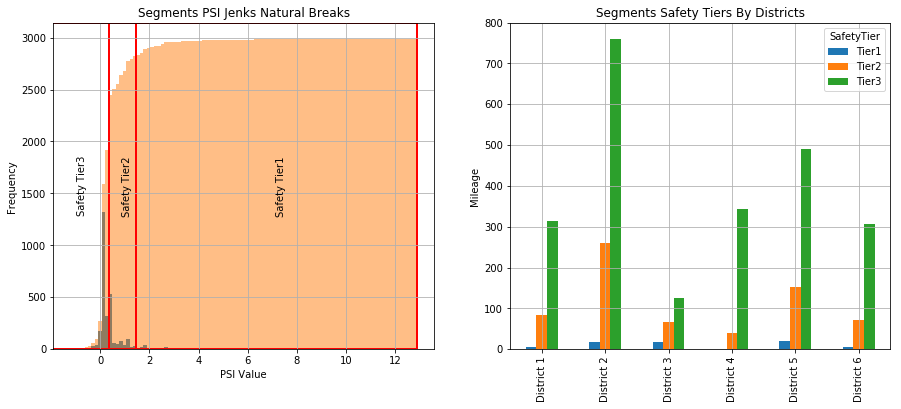

Length                                                       
name       District 1 District 2 District 3 District 4 District 5 District 6
SafetyTier                                                                  
Tier1          5.8460    18.3570    18.0197     0.0000    20.5364     4.6740
Tier2         82.8386   261.2348    66.8090    39.7260   151.6194    72.4570
Tier3        315.2589   761.0948   126.5399   342.6971   490.2121   307.0801

In [289]:
n_classes = 3
nb_res = nb(SegD_DF.PSI, k=n_classes)
display(nb_res)
#SegD_DF[SegD_DF.PSI>0].PSI.plot.hist(bins=100,cumulative=False,figsize=(15,10))
plt.subplot(1,2,1)

SegD_DF.PSI.plot.hist(bins=100,cumulative=False,figsize=(15,6))
SegD_DF.PSI.plot.hist(bins=100,cumulative=True,alpha=.5)#,xlim=plt.gca().get_xlim(),ylim=plt.gca().get_ylim())
SegD_DF['SafetyTier'] = None
for lim,lim2,tier in zip([min(SegD_DF.PSI)-1] + list(nb_res.bins)[:-1],list(nb_res.bins),reversed(['Tier{}'.format(i) for i in range(1,n_classes+1)])):
    rect = patches.Rectangle((lim,0),lim2-lim,plt.gca().get_ylim()[1]-2,linewidth=2,edgecolor='r',facecolor='none')
    plt.gca().add_patch(rect)
    plt.text(lim+(lim2-lim)/2,plt.gca().get_ylim()[1]/2,'Safety Tier' + tier[-1],rotation=90,va='center')
    SegD_DF.loc[SegD_DF.PSI>lim,'SafetyTier'] = tier
df = pd.DataFrame(SegD_DF.groupby(['name','SafetyTier']).agg({'Length':sum}))
df = df.unstack(level=0)
df = df.fillna(0)
plt.grid()
plt.title('Segments PSI Jenks Natural Breaks')
plt.xlabel('PSI Value')

ax = plt.subplot(1,2,2)
tdf = df.T
tdf.index = tdf.index.droplevel(0)
tdf.plot.bar(ax=ax)
plt.ylabel('Mileage')
plt.xlabel('')
plt.grid()
plt.title('Segments Safety Tiers By Districts')
plt.savefig('Seg_PSI.png',transparent=True,dpi=800)
plt.show()
display(df)

In [288]:
sdf['Length'] = sdf.EMP-sdf.BMP
pd.DataFrame(sdf.groupby(['District','SafetyTier'])['Length'].aggregate(sum)).unstack(0).fillna(0)

Length                                                       
District   District 1 District 2 District 3 District 4 District 5 District 6
SafetyTier                                                                  
Tier1          5.8460    18.3570    18.0197      0.000    20.5364      4.674
Tier2         86.2386   269.0348    71.6304     41.326   153.0164     72.457

              Natural_Breaks              
 
Lower            Upper               Count
         x[i] <=  1.000               1163
 1.000 < x[i] <=  6.000                346
 6.000 < x[i] <= 16.000                 30

0 1.0
1.0 5.0
6.0 10.0


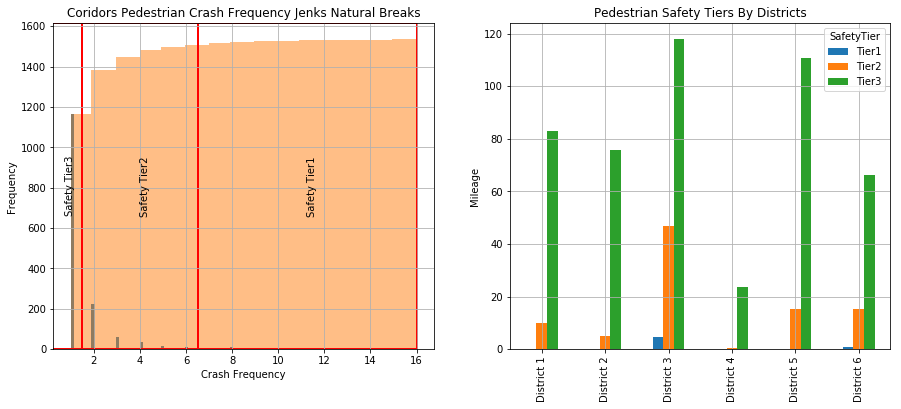

Length                                                       
name       District 1 District 2 District 3 District 4 District 5 District 6
SafetyTier                                                                  
Tier1          0.0000     0.0000     4.7920      0.000     0.2500     1.0000
Tier2         10.1179     5.1528    47.0411      0.407    15.2318    15.4090
Tier3         82.9117    75.6478   118.1569     23.520   110.6757    66.1663

In [254]:
n_classes = 3
nb_res = nb(PedD_DF.CF_Obs, k=n_classes)
display(nb_res)
plt.subplot(1,2,1)
PedD_DF.CF_Obs.plot.hist(bins=100,cumulative=False,figsize=(15,6))
PedD_DF.CF_Obs.plot.hist(bins=100,cumulative=True,alpha=.5)#,xlim=plt.gca().get_xlim(),ylim=plt.gca().get_ylim())
PedD_DF['SafetyTier'] = None
for lim,lim2,tier,adj in zip([min(PedD_DF.CF_Obs)-1] + list(nb_res.bins)[:-1],
                         list(nb_res.bins),
                         reversed(['Tier{}'.format(i) for i in range(1,n_classes+1)]),
                         [(0,0.5),(0.5,0),(.5,-.5)]):
    print(lim,lim2-lim)
    rect = patches.Rectangle((lim+adj[0],0),lim2-lim+adj[1],plt.gca().get_ylim()[1]-2,linewidth=2,edgecolor='r',facecolor='none')
    plt.gca().add_patch(rect)
    plt.text(lim+adj[0]+(lim2-lim+adj[1])/2,plt.gca().get_ylim()[1]/2,'Safety Tier' + tier[-1],rotation=90,va='center')
    #print(lim)
    PedD_DF.loc[PedD_DF.CF_Obs>lim,'SafetyTier'] = tier
df = pd.DataFrame(PedD_DF.groupby(['name','SafetyTier']).agg({'Length':sum}))
df = df.unstack(level=0)
df = df.fillna(0)
plt.grid()
plt.title('Coridors Pedestrian Crash Frequency Jenks Natural Breaks')
plt.xlabel('Crash Frequency')

ax = plt.subplot(1,2,2)
tdf = df.T
tdf.index = tdf.index.droplevel(0)
tdf.plot.bar(ax=ax)
plt.ylabel('Mileage')
plt.xlabel('')
plt.grid()
plt.title('Pedestrian Safety Tiers By Districts')
plt.savefig('Ped_CF.png',transparent=True,dpi=800)
plt.show()
display(df)

In [284]:
pdf['Length'] = pdf.EMP-pdf.BMP
pd.DataFrame(pdf.groupby(['District','SafetyTier'])['Length'].aggregate(sum)).unstack(0).fillna(0)

Length                                                       
District   District 1 District 2 District 3 District 4 District 5 District 6
SafetyTier                                                                  
Tier1          0.0000     0.0000     4.7920      0.000     0.2500      1.000
Tier2         10.1179     5.1528    47.0411      0.407    15.2318     15.409

              Natural_Breaks              
 
Lower            Upper               Count
         x[i] <=  2.000               5832
 2.000 < x[i] <=  6.000                997
 6.000 < x[i] <= 47.000                355

0                                                         \
District        District 1 District 2 District 3 District 4 District 5   
SafetyTier                                                               
Tier1       0.0       44.0       20.0      249.0        0.0       37.0   
Tier2       0.0      138.0      156.0      495.0        6.0      177.0   
Tier3       3.0      907.0     1458.0     1978.0      194.0     1047.0   

                       
District   District 6  
SafetyTier             
Tier1             5.0  
Tier2            25.0  
Tier3           245.0

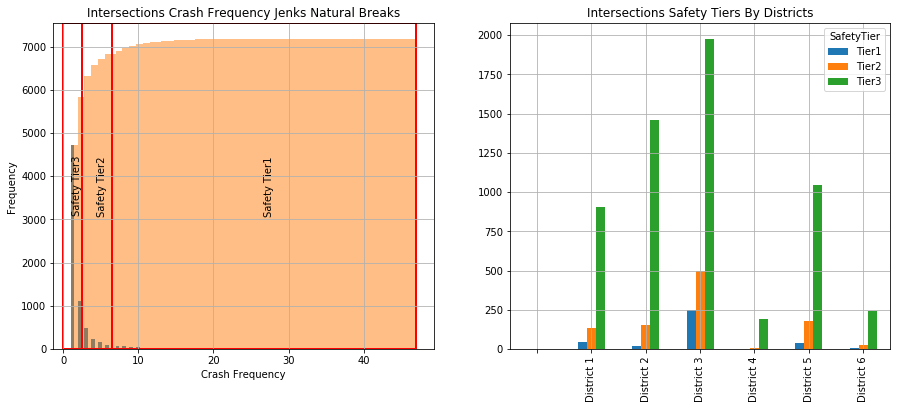

In [24]:
# Intersections based on crash frequency
n_classes = 3
nb_res = nb(IntD_DF.CF_Obs, k=n_classes)
display(nb_res)
plt.subplot(1,2,1)
IntD_DF.CF_Obs.plot.hist(bins=100,cumulative=False,figsize=(15,6))
IntD_DF.CF_Obs.plot.hist(bins=100,cumulative=True,alpha=.5)#,xlim=plt.gca().get_xlim(),ylim=plt.gca().get_ylim())
IntD_DF['SafetyTier'] = None
for lim,lim2,tier,adj in zip([min(IntD_DF.CF_Obs)-1] + list(nb_res.bins)[:-1],
                             list(nb_res.bins),
                             reversed(['Tier{}'.format(i) for i in range(1,n_classes+1)]),
                             [(0,0.5),(0.5,0),(.5,-.5)]):
    rect = patches.Rectangle((lim+adj[0],0),lim2-lim+adj[1],plt.gca().get_ylim()[1]-2,linewidth=2,edgecolor='r',facecolor='none')
    plt.gca().add_patch(rect)
    plt.text(lim+adj[0]+(lim2-lim+adj[1])/2,plt.gca().get_ylim()[1]/2,'Safety Tier' + tier[-1],rotation=90,va='center')

    #print(lim)
    IntD_DF.loc[IntD_DF.CF_Obs>lim,'SafetyTier'] = tier
df = pd.DataFrame(IntD_DF.groupby(['District','SafetyTier']).size())
df = df.unstack(level=0)
df = df.fillna(0)
plt.grid()
plt.title('Intersections Crash Frequency Jenks Natural Breaks')
plt.xlabel('Crash Frequency')
#plt.show()
display(df)
ax = plt.subplot(1,2,2)
tdf = df.T
tdf.index = tdf.index.droplevel(0)
tdf.plot.bar(ax=ax)
plt.ylabel('')
plt.xlabel('')
plt.title('Intersections Safety Tiers By Districts')
plt.grid()
plt.savefig('Int_CF.png',transparent=True,dpi=800)
plt.show()

             Natural_Breaks             
 
Lower          Upper               Count
        x[i] <= 0.025               1231
0.025 < x[i] <= 0.099                632
0.099 < x[i] <= 0.746                 64

0                                                       
name        District 1 District 2 District 3 District 4 District 5 District 6
SafetyTier2                                                                  
Tier1               10         17          7         10          9         11
Tier2              121        145        221         14         90         41
Tier3              175        235        472         17        280         52

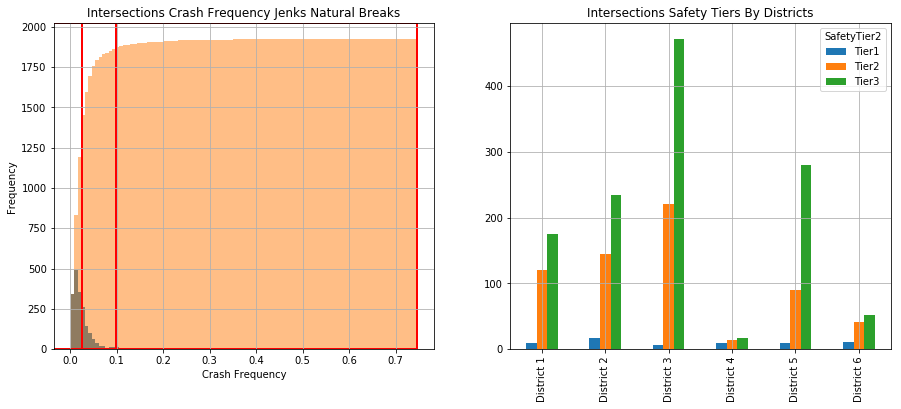

In [235]:
# Intersections based on Crash Rates
n_classes = 3
IntD_DF['MEV'] = IntD_DF.AADT_Major + IntD_DF.AADT_Minor
IntD_DF['MEV'] = IntD_DF['MEV']/1000000*5*365
IntD_DF['CrashRate'] = IntD_DF.CF_Obs/IntD_DF.MEV/5.0
nb_res = nb(IntD_DF[(IntD_DF.HasAADT=='HasBoth') & (~pd.isnull(IntD_DF.CrashRate))].CrashRate, k=n_classes)
display(nb_res)
plt.subplot(1,2,1)
IntD_DF[(IntD_DF.HasAADT=='HasBoth') & (~pd.isnull(IntD_DF.CrashRate))].CrashRate.plot.hist(bins=100,cumulative=False,figsize=(15,6))
IntD_DF[(IntD_DF.HasAADT=='HasBoth') & (~pd.isnull(IntD_DF.CrashRate))].CrashRate.plot.hist(bins=100,cumulative=True,alpha=.5)#,xlim=plt.gca().get_xlim(),ylim=plt.gca().get_ylim())
IntD_DF['SafetyTier2'] = None
for lim,lim2,tier in zip([min(IntD_DF.CrashRate)-1] + list(nb_res.bins)[:-1],list(nb_res.bins),reversed(['Tier{}'.format(i) for i in range(1,n_classes+1)])):
    rect = patches.Rectangle((lim,0),lim2-lim,plt.gca().get_ylim()[1]-2,linewidth=2,edgecolor='r',facecolor='none')
    plt.gca().add_patch(rect)
    #print(lim)
    IntD_DF.loc[(IntD_DF.HasAADT=='HasBoth') & (~pd.isnull(IntD_DF.CrashRate)) & (IntD_DF.CrashRate>lim),'SafetyTier2'] = tier
df = pd.DataFrame(IntD_DF.groupby(['name','SafetyTier2']).size())
df = df.unstack(level=0)
df = df.fillna(0)
plt.grid()
plt.title('Intersections Crash Frequency Jenks Natural Breaks')
plt.xlabel('Crash Frequency')
#plt.show()
display(df)
ax = plt.subplot(1,2,2)
tdf = df.T
tdf.index = tdf.index.droplevel(0)
tdf.plot.bar(ax=ax)
plt.ylabel('')
plt.xlabel('')
plt.title('Intersections Safety Tiers By Districts')
plt.grid()
plt.savefig('Int_CR.png',transparent=True,dpi=800)
plt.show()

In [226]:
Res_GDB = r'\\CHCFPP01\Proj\ILDOT\650511SAFETYPROGRAM\4_WorkData\WO00_OtherStates\NewMexico\3_WorkData\7_NetworkScreening\8.Deliverable\Results.gdb'
Ped_FC = Res_GDB + '\\Corr_PedCF_Tiers' 
Seg_FC = Res_GDB + '\\Seg_PSI_Tiers' 
Int_FC = Res_GDB + '\\Int_CF_Tiers' 
for fc,df in zip([Seg_FC,Ped_FC,Int_FC],[SegD_DF,PedD_DF,IntD_DF]):
    hsmpy3.common.PrintSummary(fc)
    print(df.shape)

Type: Polyline
Columns: 38 x Rows: 2991
['AADT_2016', 'BMP', 'CF_Exp', 'CF_Obs', 'CF_Pred', 'CF_Pred_2012', 'CF_Pred_2013', 'CF_Pred_2014', 'CF_Pred_2015', 'CF_Pred_2016', 'EB_w', 'EMP', 'FACILITY_TYPE', 'FType', 'F_SYSTEM', 'Join_Count', 'Length', 'MEDIAN_TYPE', 'OBJECTID', 'OWNERSHIP', 'PSI', 'RID', 'SPEED_LIMIT', 'SPF_a', 'SPF_b', 'SPF_k', 'Seg_k', 'Shape', 'Shape_Length', 'TARGET_FID', 'THROUGH_LANES', 'URBAN_CODE', 'commission', 'disteng', 'distnum', 'grip_stip', 'lane_miles', 'name']
(2991, 39)
Type: Polyline
Columns: 25 x Rows: 1539
['AADT_2016', 'BMP', 'CF_Obs', 'EMP', 'FACILITY_TYPE', 'FType', 'F_SYSTEM', 'Join_Count', 'Length', 'MEDIAN_TYPE', 'OBJECTID', 'OWNERSHIP', 'RID', 'SPEED_LIMIT', 'Shape', 'Shape_Length', 'TARGET_FID', 'THROUGH_LANES', 'URBAN_CODE', 'commission', 'disteng', 'distnum', 'grip_stip', 'lane_miles', 'name']
(1539, 26)
Type: Point
Columns: 27 x Rows: 7184
['AADT_Major', 'AADT_Minor', 'CF_Obs', 'FType_Major', 'FType_Minor', 'F_SYSTEM_Major', 'F_SYSTEM_Minor'

In [256]:
arcpy.management.AddField(Seg_FC,'SafetyTier','Short')
uc = arcpy.UpdateCursor(Seg_FC)
for row in uc:
    oid = row.getValue('OBJECTID')
    try:
        tier = SegD_DF.loc[oid,'SafetyTier'][-1]
        row.setValue('SafetyTier',tier)
        uc.updateRow(row)
    except:
        print('Failed',oid)
del uc
del row
df = hsmpy3.common.FCtoDF(Seg_FC,selectedFields=['SafetyTier'])
df.SafetyTier.value_counts()

3    1911
2     917
1     163
Name: SafetyTier, dtype: int64

In [257]:
arcpy.management.AddField(Ped_FC,'SafetyTier','Short')
uc = arcpy.UpdateCursor(Ped_FC)
for row in uc:
    oid = row.getValue('OBJECTID')
    try:
        tier = PedD_DF.loc[oid,'SafetyTier'][-1]
        row.setValue('SafetyTier',tier)
        uc.updateRow(row)
    except:
        print('Failed',oid)
del uc
del row
df = hsmpy3.common.FCtoDF(Ped_FC,selectedFields=['SafetyTier'])
df.SafetyTier.value_counts()

3    1163
2     346
1      30
Name: SafetyTier, dtype: int64

In [ ]:
#arcpy.management.AddField(Int_FC,'SafetyTier','Short')
uc = arcpy.UpdateCursor(Int_FC)
for row in uc:
    oid = row.getValue('FID')
    try:
        tier = IntD_DF.loc[oid,'SafetyTier'][-1]
        row.setValue('SafetyTier',tier)
        uc.updateRow(row)
    except:
        print('Failed',oid)
del uc
del row
df = hsmpy3.common.FCtoDF(Int_FC)
display(pd.DataFrame(df.groupby(['District','SafetyTier'])['CF_Obs'].aggregate(lambda x:';'.join([str(min(x)),str(max(x))]))))

In [ ]:
F1 = ['RID','BMP','EMP']
F2 = ['SafetyTier','name']
DF = SegD_DF
df = DF[F1+F2]
df.index = range(0,df.shape[0])
df = df.sort_values(by=['RID','BMP'])
df = df.fillna(-1)
idx = df.groupby(['RID'] + F2)['BMP'].shift(-1) != df['EMP']
df['EMP2'] = df.loc[idx, 'EMP']
df['EMP2'] = df.groupby(['RID'] + F2)['EMP2'].fillna(method='backfill')
df['EMP2'] = df['EMP2'].fillna(df['EMP']) 
sdf = df.groupby(['RID'] + F2 + ['EMP2'], as_index=False).agg({'BMP': 'first', 'EMP': 'last'}).drop(['EMP2'], axis=1)
sdf = sdf.sort_values(['SafetyTier','name','RID','BMP'])
sdf = sdf[sdf.SafetyTier.isin(['Tier1','Tier2'])]
sdf = sdf[~pd.isnull(sdf.name)]

out = GDB+'\\seg'
arcpy.Delete_management(out)
arcpy.CreateTable_management(out_path=os.path.dirname(out),out_name=os.path.basename(out))
arcpy.AddField_management(out,'ROUTE_ID','TEXT')
arcpy.AddField_management(out,'BEG_POINT','DOUBLE')
arcpy.AddField_management(out,'END_POINT','DOUBLE')
arcpy.AddField_management(out,'name','TEXT')
arcpy.AddField_management(out,'SafetyTier','TEXT')
IC = arcpy.InsertCursor(out)
for i,rr in sdf.iterrows():
                    r = IC.newRow()
                    r.setValue('ROUTE_ID',rr.RID)
                    r.setValue('BEG_POINT',rr.BMP)
                    r.setValue('END_POINT',rr.EMP)
                    r.setValue('name',rr.name)
                    r.setValue('SafetyTier',rr.SafetyTier)
                    IC.insertRow(r)
del IC
hsmpy3.common.PrintSummary(out)
out2 = GDB + '\\out3'
arcpy.Delete_management(out2)
hsmpy3.network.CreateRouteEventLayer(AttTable=out,BMP='BEG_POINT',EMP='END_POINT',Fields=['name','SafetyTier'],RouteID='ROUTE_ID',Output=out2,Sites_Routes=Routes[2016])
hsmpy3.common.PrintSummary(out2)
pdf2 = hsmpy3.common.FCtoDF(out2,readGeometry=True)
pdf2.index = pd.MultiIndex.from_arrays([pdf2.ROUTE_ID,pdf2.BEG_POINT,pdf2.END_POINT])
sdf.index = pd.MultiIndex.from_arrays([sdf.RID,sdf.BMP,sdf.EMP])
sdf['Shape'] = pdf2.Shape.loc[sdf.index]
sdf = sdf[~pd.isnull(sdf.Shape)]
#sdf['Link_LabelPoint'] = sdf.Shape.apply(lambda x:LinkFromPoint(x))
sdf['Link_Seg'] = sdf.Shape.apply(lambda x:LinkFromPoint2(x))
sdf = sdf.rename(columns={'name':'District'})
sdf[['District','SafetyTier','Link_Seg']].to_excel('Seg_PSI.xlsx')

In [145]:
F1 = ['RID','BMP','EMP']
F2 = ['SafetyTier','name']
DF = PedD_DF
df = DF[F1+F2]
df.index = range(0,df.shape[0])
df = df.sort_values(by=['RID','BMP'])
df = df.fillna(-1)
idx = df.groupby(['RID'] + F2)['BMP'].shift(-1) != df['EMP']
df['EMP2'] = df.loc[idx, 'EMP']
df['EMP2'] = df.groupby(['RID'] + F2)['EMP2'].fillna(method='backfill')
df['EMP2'] = df['EMP2'].fillna(df['EMP']) 
pdf = df.groupby(['RID'] + F2 + ['EMP2'], as_index=False).agg({'BMP': 'first', 'EMP': 'last'}).drop(['EMP2'], axis=1)
pdf = pdf.sort_values(['SafetyTier','name','RID','BMP'])
pdf = pdf[pdf.SafetyTier.isin(['Tier1','Tier2'])]
pdf = pdf[~pd.isnull(pdf.name)]

out = GDB+'\\ped'
arcpy.Delete_management(out)
arcpy.CreateTable_management(out_path=os.path.dirname(out),out_name=os.path.basename(out))
arcpy.AddField_management(out,'ROUTE_ID','TEXT')
arcpy.AddField_management(out,'BEG_POINT','DOUBLE')
arcpy.AddField_management(out,'END_POINT','DOUBLE')
arcpy.AddField_management(out,'name','TEXT')
arcpy.AddField_management(out,'SafetyTier','TEXT')
IC = arcpy.InsertCursor(out)
for i,rr in pdf.iterrows():
                    r = IC.newRow()
                    r.setValue('ROUTE_ID',rr.RID)
                    r.setValue('BEG_POINT',rr.BMP)
                    r.setValue('END_POINT',rr.EMP)
                    r.setValue('name',rr.name)
                    r.setValue('SafetyTier',rr.SafetyTier)
                    IC.insertRow(r)
del IC
hsmpy3.common.PrintSummary(out)
out2 = GDB + '\\out2'
arcpy.Delete_management(out2)
hsmpy3.network.CreateRouteEventLayer(AttTable=out,BMP='BEG_POINT',EMP='END_POINT',Fields=['name','SafetyTier'],RouteID='ROUTE_ID',Output=out2,Sites_Routes=Routes[2016])
hsmpy3.common.PrintSummary(out2)
pdf2 = hsmpy3.common.FCtoDF(out2,readGeometry=True)
pdf2.index = pd.MultiIndex.from_arrays([pdf2.ROUTE_ID,pdf2.BEG_POINT,pdf2.END_POINT])
pdf.index = pd.MultiIndex.from_arrays([pdf.RID,pdf.BMP,pdf.EMP])
pdf['Shape'] = pdf2.Shape.loc[pdf.index]
pdf = pdf[~pd.isnull(pdf.Shape)]
#pdf['Link'] = pdf.Shape.apply(lambda x:LinkFromPoint(x))
#pdf = pdf.rename(columns={'name':'District'})
#pdf[['District','SafetyTier','Link']].to_excel('Ped_CF.xlsx')
#pdf['Link_LabelPoint'] = pdf.Shape.apply(lambda x:LinkFromPoint(x))
pdf['Link_Seg'] = pdf.Shape.apply(lambda x:LinkFromPoint2(x))
pdf = pdf.rename(columns={'name':'District'})
pdf[['District','SafetyTier','Link_Seg']].to_excel('Ped_CF.xlsx')

Type: Table
Columns: 6 x Rows: 250
['BEG_POINT', 'END_POINT', 'OBJECTID', 'ROUTE_ID', 'SafetyTier', 'name']
Type: Polyline
Columns: 9 x Rows: 249
['BEG_POINT', 'END_POINT', 'LOC_ERROR', 'OBJECTID', 'ROUTE_ID', 'SafetyTier', 'Shape', 'Shape_Length', 'name']


C:\Users\mr068144\AppData\Roaming\Python\Python35\site-packages\ipykernel_launcher.py:43: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


In [61]:
F = [#'Int_ID',
 'Signal',
 'Legs',
 #'RIDList',
 #'IFType',
 #'I_URBANCODE',
 #'FType_Major',
 #'FType_Minor',
 #'F_SYSTEM_Major',
 #'F_SYSTEM_Minor',
 #'OWNERSHIP_Major',
 #'OWNERSHIP_Minor',
 #'AADT_Major',
 #'AADT_Minor',
 'NAD83_X',
 'NAD83_Y',
 'CF_Obs',
 'name',
 #'Shape',
 'SafetyTier','Link']
IntD_DF['Link'] = IntD_DF.Shape.apply(lambda x:LinkFromPoint(x))
idf = IntD_DF[F][IntD_DF.SafetyTier.isin(['Tier1','Tier2'])]
idf = idf[~pd.isnull(idf.name)]
idf = idf.sort_values(['name','SafetyTier'])
idf.to_excel('IntersectionTopSafetyTier.xlsx')

In [140]:
def LinkFromPoint(p):
    if p.type=='polyline':
        if p.length>0:
            p = arcpy.Geometry('POINT',p.labelPoint,hsmpy3.nm.NAD83_NM)
            p = p.projectAs(hsmpy3.common.WGS1984)
            s = '{},{}'.format(p.firstPoint.Y,p.firstPoint.X)
            s = 'https://www.google.com/maps?q=loc:{}&t=k'.format(s)
            return(s)
    else:
        p = p.projectAs(hsmpy3.common.WGS1984)
        s = '{},{}'.format(p.firstPoint.Y,p.firstPoint.X)
        s = 'https://www.google.com/maps?q=loc:{}&t=k'.format(s)
        return(s)
def LinkFromPoint2(p):
    if p.type=='polyline':
        if p.length>0:
            p1 = arcpy.Geometry('POINT',p.firstPoint,hsmpy3.nm.NAD83_NM)
            p2 = arcpy.Geometry('POINT',p.lastPoint,hsmpy3.nm.NAD83_NM)
            p1 = p1.projectAs(hsmpy3.common.WGS1984)
            p2 = p2.projectAs(hsmpy3.common.WGS1984)
            p1 = '{},{}'.format(p1.firstPoint.Y,p1.firstPoint.X)
            p2 = '{},{}'.format(p2.firstPoint.Y,p2.firstPoint.X)
            url = r'https://www.google.com/maps/dir/{}/{}/@{}'.format(p1,p2,p1)
            return(url)
    else:
        p = p.projectAs(hsmpy3.common.WGS1984)
        s = '{},{}'.format(p.firstPoint.Y,p.firstPoint.X)
        s = 'https://www.google.com/maps?q=loc:{}&t=k'.format(s)
        return(s)

#SegD_DF['Link'] = SegD_DF.Shape.apply(lambda x:LinkFromPoint(x))
#SegD_DF.Link.iloc[0]

In [ ]:
F = ['RID', 'BMP', 'EMP', 'Length', 'FType', 'AADT_2016', 'F_SYSTEM', 'FACILITY_TYPE', 'OWNERSHIP', 'URBAN_CODE', 'THROUGH_LANES', 'MEDIAN_TYPE', 'SPEED_LIMIT', 'CF_Obs', 'CF_Pred', 'CF_Exp', 'PSI', 'CF_Pred_2012', 'CF_Pred_2013', 'CF_Pred_2014', 'CF_Pred_2015', 'CF_Pred_2016', 'SPF_a', 'SPF_b', 'SPF_k', 'Seg_k', 'EB_w','name' ,'PSI_CDF', 'SafetyTier', 'Link']
SegD_DF = SegD_DF[F]
SegD_DF.sort_values(['SafetyTier','RID','BMP'])

In [152]:
print(IntD_DF.shape[0],IntD_DF.CF_Obs.sum())
print(IntD_DF[IntD_DF.AADT_Major>0].shape[0],IntD_DF[IntD_DF.AADT_Major>0].CF_Obs.sum())
print(IntD_DF[(IntD_DF.AADT_Major>0) & (IntD_DF.AADT_Minor>0)].shape[0],IntD_DF[(IntD_DF.AADT_Major>0) & (IntD_DF.AADT_Minor>0)].CF_Obs.sum())

7184 14633
5837 13160
1927 6868


In [161]:
IntD_DF[(IntD_DF.AADT_Major>0) & (IntD_DF.AADT_Minor>0)].SafetyTier.value_counts()

Tier2    870
Tier3    756
Tier1    301
Name: SafetyTier, dtype: int64

In [175]:
def HasAADT(a1,a2):
    hasa1 = False
    if a1>0:
        hasa1=True
    hasa2 = False
    if a2>0:
        hasa2=True
    if a1 and a2:
        return('HasBoth')
    if a1 and not a2:
        return('HasMajor')
    return('NoAADT')
IntD_DF['HasAADT'] = [HasAADT(a1,a2) for a1,a2 in zip(IntD_DF.AADT_Major,IntD_DF.AADT_Minor)] 
df = pd.DataFrame(IntD_DF.groupby(['HasAADT','SafetyTier']).CF_Obs.aggregate(sum))
#df = df/IntD_DF.CF_Obs.sum()
df = pd.DataFrame(IntD_DF.groupby(['HasAADT','SafetyTier']).size())
#df = df/IntD_DF.shape[0]

df = df.unstack(level=0)
df = df.fillna(0)
df = df.astype(int)
df

0                
HasAADT    HasBoth HasMajor NoAADT
SafetyTier                        
Tier1          301       54      0
Tier2          872     1141     99
Tier3          776     2693   1248

In [ ]:
def PolylineToDF(p):
    df = pd.DataFrame(columns=['partID','pntID','X','Y','Z','M'])
    i = 0
    prt_i = -1
    for prt in p:
        prt_i += 1
        pnt_i = -1
        for pnt in prt:
            pnt_i += 1
            i += 1
            df.loc[i] = [prt_i,pnt_i,pnt.X,pnt.Y,pnt.Z,pnt.M]
    return(df)
def SegmentAlongLine(p,bmp,emp):
    df = PolylineToDF(p)
    df = df[(df.M>=bmp) & (df.M<=emp)]
    prts = []
    for prt in set(df.partID):
        pdf = df[df.partID==prt]
        prts.append(arcpy.Array([arcpy.Point(X=x,Y=y,M=m) for x,y,m in zip(pdf.X,pdf.Y,pdf.M)]))
    print(len(prts))
    return(arcpy.Polyline(inputs=arcpy.Array(prts),spatial_reference=p.spatialReference,has_m=True))
p = R_DF.loc[R_DF.ROUTE_ID=='FL-4057-M','Shape'].item()
df = PolylineToDF(p)
display(df)
p_r = SegmentAlongLine(p,0,df.M.max())
df = PolylineToDF(p_r)
display(df)


In [4]:
Dir = r'\\CHCFPP01\Proj\ILDOT\650511SAFETYPROGRAM\4_WorkData\WO00_OtherStates\NewMexico\3_WorkData\7_NetworkScreening\8.Deliverable\Shapefiles'
Types = ['Segment','Pedestrian','Int']
State = [os.path.join(Dir,'State_{}.shp'.format(i)) for i in Types]
State_XLS = [os.path.join(Dir,'State_{}.xls'.format(i)) for i in Types]
for sh,ex in zip(State,State_XLS):
    #hsmpy3.common.PrintSummary(sh)
    arcpy.TableToExcel_conversion(Input_Table=sh,Output_Excel_File=ex)

In [23]:
F_SYSTEM = {
1: 'Interstate',
2: 'Principal Arterial – Other Freeways and Expressways',
3: 'Principal Arterial – Other',
4: 'Minor Arterial',
5: 'Major Collector',
6: 'Minor Collector',
7: 'Local'}

FACILITY_TYPE = {
1: 'One-Way Roadway',
2: 'Two-Way Roadway',
4: 'Ramp',
5: 'Non Mainline',
6: 'Non Inventory Direction',
7: 'Planned/Unbuilt'
}

Median_Type = {
1: 'None',
2: 'Unprotected',
3: 'Curbed',
4: 'Positive Barrier'
}
Ownership = {
0:'Not Provided',
1:'State Highway Agency',
2:'County Highway Agency',
4:'City or Municipality Agency',
26:'Private (Other than Railroad)',
50:'Indian Tribe Nation',
60:'Other Federal Agency',
62:'Bureau of Indian Affairs',
64:'US Forest Services',
74:'Army',
80:'Other'
}

In [30]:
pd.options.display.float_format = '{:,.2f}'.format
df = pd.DataFrame(SegD_DF.groupby(['SafetyTier','OWNERSHIP'])['Mileage'].aggregate(sum)).unstack().fillna(0)
df.columns = df.columns.droplevel(0)
df = df.rename(columns=Ownership)
display(df)
df = pd.DataFrame(PedD_DF.groupby(['SafetyTier','OWNERSHIP'])['Mileage'].aggregate(sum)).unstack().fillna(0)
df.columns = df.columns.droplevel(0)
df = df.rename(columns=Ownership)
display(df)
df = pd.DataFrame(IntD_DF.groupby(['SafetyTier','OWNERSHIP_']).size()).unstack().fillna(0).astype(int)
df.columns = df.columns.droplevel(0)
df = df.rename(columns=Ownership)
display(df)


OWNERSHIP,Not Provided,State Highway Agency,County Highway Agency,City or Municipality Agency,Other Federal Agency,US Forest Services,Army
SafetyTier,,,,,,,
1,0.00,53.70,0.00,10.47,0.00,0.00,0.00
2,9.58,594.46,4.85,53.25,0.00,0.00,0.00
3,23.95,"2,131.95",101.25,82.34,1.60,7.61,1.80


OWNERSHIP,Not Provided,State Highway Agency,County Highway Agency,City or Municipality Agency,Indian Tribe Nation,US Forest Services,Other
SafetyTier,,,,,,,
1,0.00,1.65,0.00,4.39,0.00,0.00,0.00
2,0.35,50.15,0.00,43.10,0.00,0.00,0.00
3,40.13,285.95,12.78,137.98,0.15,0.03,0.08


OWNERSHIP_,Not Provided,State Highway Agency,County Highway Agency,City or Municipality Agency,Private (Other than Railroad),Indian Tribe Nation,Other Federal Agency,Bureau of Indian Affairs,US Forest Services,Other
SafetyTier,,,,,,,,,,
1,0,142,2,211,0,0,0,0,0,0
2,12,379,10,596,0,0,0,0,0,0
3,1015,1725,350,2708,11,7,3,3,6,1
